In [1]:
import numpy as np
import pandas as pd

# <font size = 3> Web Scrapping to fetch data

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/list/ls050782187/'
response = requests.get(url)

data = response.text

bs_data = BeautifulSoup(data) # get html data in readable format

# extraction of feature values for each of the webpage

pages = list(range(1,6))
dataset = pd.DataFrame(columns = ["Name of the movie", "Year of release", "Director", "Actors", "Watchtime", "Genres", "Movie Rating", "Metascore", "Votes", "Gross Collection"])

for each_page in pages:
    url_page = f"https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page={each_page}"
    response = requests.get(url_page)
    
    data = response.text
    
    bs_data = BeautifulSoup(data)
    
    movie_data = bs_data.find_all('div', attrs = {'class':'lister-item-content'})
    
    for ele in movie_data:
        
        name = ele.h3.a.text
        
        released_year = ele.h3.find('span', attrs = {'class':'lister-item-year text-muted unbold'}).text.replace("(", '').replace(")",'')
        if released_year == None:
            released_year = np.nan
        
        val1 = ele.find_all("p", attrs = {"class": "text-muted text-small"})[1]
        
        direct = val1.find_all("a")[0].text
        
        stars = ""
        for i in val1.find_all("a")[1:]:
            stars += f"{i.text}, "
    
        runtime = ele.p.find('span', attrs = {'class':'runtime'}).text.replace(' min','')
       
    
        genres = ele.p.find('span', attrs = {'class':'genre'}).text.replace('\n','').replace('            ','')
        
    
        rat = ele.div.find('span', attrs = {'class':'ipl-rating-star__rating'}).text
       
    
        m_score = ele.find('span', attrs = {'class':'metascore'}).text.replace('        ','') if ele.find('span', attrs = {'class':'metascore'}) else np.nan
       
    
        val = ele.find_all('span', attrs = {'name':'nv'})
    
        vote = val[0].text
        
    
        gro = val[1].text if len(val) >1 else np.nan
        
        data_dict = {'Name of the movie': name, 'Year of release': released_year, 'Director': direct, 'Actors': stars, 'Watchtime': runtime, 'Genres': genres, 'Movie Rating': rat, 'Metascore': m_score, 'Votes': vote, 'Gross Collection':gro}  
        
        dataset = dataset.append(data_dict, ignore_index = True)

dataset.head(5)

,Name of the movie,Year of release,Director,Actors,Watchtime,Genres,Movie Rating,Metascore,Votes,Gross Collection
0,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",175,"Crime, Drama",9.2,100,"1,868,078",$134.97M
1,The Silence of the Lambs,1991,Jonathan Demme,"Jodie Foster, Anthony Hopkins, Lawrence A. Bon...",118,"Crime, Drama, Thriller",8.6,85,"1,440,043",$130.74M
2,The Empire Strikes Back,1980,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",124,"Action, Adventure, Fantasy",8.7,82,"1,298,810",$290.48M
3,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",142,Drama,9.3,81,"2,692,411",$28.34M
4,The Shining,1980,Stanley Kubrick,"Jack Nicholson, Shelley Duvall, Danny Lloyd, S...",146,"Drama, Horror",8.4,66,"1,029,055",$44.02M


What we can observe (in terms of data cleaning) from the above glimpse of data is <br>
- **Votes** feature needs removal of commas 
- **Gross Collection** has dollar symbol and 'M' letter
- **Genres** has string of text which need to separated

# <font size = 3> Data Cleaning

In [3]:
import re

# removal of commas from Votes feature values
dataset["Votes"] = dataset["Votes"].apply(lambda x:re.sub("[^0-9.]","", x))

# removal of special symbols from Gross Collection
dataset["Gross Collection"] = dataset["Gross Collection"].replace({'\$':''}, regex = True).replace({'M':''}, regex = True).astype(float)

# cleaning of Year of release feature
dataset["Year of release"] = dataset["Year of release"].apply(lambda x:re.sub("[^0-9.]","", x))

dataset.head(5)

dataset.to_csv("Project Webscraping.csv", index = False) # saving cleaned data to the local drive

dataset = pd.read_csv("Project Webscraping.csv")

print(dataset.shape)

(500, 10)


In [4]:
# check for nulls in data and display them
if dataset.isnull().values.any():
    print(dataset.isnull().sum())
else:
    print("no null values")

Name of the movie     0
Year of release       0
Director              0
Actors                0
Watchtime             0
Genres                0
Movie Rating          0
Metascore             9
Votes                 0
Gross Collection     19
dtype: int64


In [5]:
# drop null valued rows
dataset.dropna(axis = 0, inplace = True)

# check for duplicate rows and drop them
if dataset.duplicated().any():
    dataset = dataset.drop_duplicates()

dataset.head(5)

,Name of the movie,Year of release,Director,Actors,Watchtime,Genres,Movie Rating,Metascore,Votes,Gross Collection
0,The Godfather,1972,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",175,"Crime, Drama",9.2,100.0,1868078,134.97
1,The Silence of the Lambs,1991,Jonathan Demme,"Jodie Foster, Anthony Hopkins, Lawrence A. Bon...",118,"Crime, Drama, Thriller",8.6,85.0,1440043,130.74
2,The Empire Strikes Back,1980,Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",124,"Action, Adventure, Fantasy",8.7,82.0,1298810,290.48
3,The Shawshank Redemption,1994,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",142,Drama,9.3,81.0,2692411,28.34
4,The Shining,1980,Stanley Kubrick,"Jack Nicholson, Shelley Duvall, Danny Lloyd, S...",146,"Drama, Horror",8.4,66.0,1029055,44.02


# <font size = 4> Data Analysis

In [6]:
dataset.describe()

,Year of release,Watchtime,Movie Rating,Metascore,Votes,Gross Collection
count,480.000000,480.000000,480.000000,480.000000,4.800000e+02,480.000000
mean,1995.460417,124.116667,7.682500,73.370833,4.574579e+05,88.600104
std,15.791388,24.839084,0.589244,13.649198,4.382781e+05,109.925233
min,1931.000000,76.000000,5.600000,31.000000,3.030000e+03,0.010000
25%,1989.750000,106.000000,7.400000,64.000000,1.488125e+05,17.087500
50%,2000.000000,121.000000,7.700000,74.000000,3.106415e+05,52.630000
75%,2006.000000,137.000000,8.100000,84.000000,6.507598e+05,118.722500
max,2015.000000,238.000000,9.300000,100.000000,2.692411e+06,936.660000


In [7]:
dataset.dtypes

Name of the movie     object
Year of release        int64
Director              object
Actors                object
Watchtime              int64
Genres                object
Movie Rating         float64
Metascore            float64
Votes                  int64
Gross Collection     float64
dtype: object

### movie having runtime >= 180 minutes

In [8]:
dataset[dataset["Watchtime"] >= 180]["Name of the movie"]

8      The Lord of the Rings: The Return of the King
11                             The Godfather Part II
13                                  Schindler's List
26                                Gone with the Wind
77                                          Magnolia
103                                  The Deer Hunter
108                               Lawrence of Arabia
111                               Dances with Wolves
123                                          Ben-Hur
139                                   The Green Mile
222                                              JFK
303                                        Spartacus
357                                          Titanic
463                                        King Kong
Name: Name of the movie, dtype: object

## Year in which there is highest average voting

In [9]:
dataset.groupby('Year of release')['Votes'].mean().sort_values(ascending = False).head(15)

Year of release
1994    1.098679e+06
1983    9.538020e+05
1966    7.657680e+05
1977    7.409595e+05
1975    7.232257e+05
2015    6.921378e+05
1972    6.782233e+05
2008    6.583818e+05
1985    6.552695e+05
2012    6.513130e+05
1995    6.465548e+05
1980    6.263930e+05
1974    5.913257e+05
1999    5.786761e+05
1942    5.753530e+05
Name: Votes, dtype: float64

## Year in which there is highest average revenue

In [10]:
dataset.groupby('Year of release')['Gross Collection'].mean().sort_values(ascending = False).head(15)

Year of release
2015    371.457500
2012    185.235000
1977    184.770000
1983    177.365000
1985    139.660000
2009    138.952308
2008    136.087333
1984    134.322500
2014    128.897500
1975    124.410000
1982    122.701667
1994    121.731111
1990    117.256250
2013    116.255625
1973    112.242500
Name: Gross Collection, dtype: float64

## Average rating for each director

In [11]:
dataset.groupby('Director')['Movie Rating'].mean().sort_values(ascending = False)

Director
Sidney Lumet         9.00
Frank Darabont       8.95
Irvin Kershner       8.70
Lana Wachowski       8.70
Sergio Leone         8.65
                     ... 
Olivier Megaton      6.20
John Erick Dowdle    6.20
Joseph Ruben         6.20
Ryan Murphy          5.80
Jim Gillespie        5.80
Name: Movie Rating, Length: 265, dtype: float64

## Top lengthy movies

In [12]:
dataset[['Name of the movie','Watchtime']].sort_values(by = 'Watchtime', ascending = False, ignore_index = True).head(15)

,Name of the movie,Watchtime
0,Gone with the Wind,238
1,Lawrence of Arabia,218
2,Ben-Hur,212
3,The Godfather Part II,202
4,The Lord of the Rings: The Return of the King,201
5,Spartacus,197
6,Schindler's List,195
7,Titanic,194
8,JFK,189
9,The Green Mile,189


## No.of movies per year

In [13]:
dataset["Year of release"].value_counts()

2004    26
2001    25
2000    23
2006    20
2005    20
        ..
1948     1
1942     1
1941     1
1936     1
1931     1
Name: Year of release, Length: 68, dtype: int64

## Most popular movie

In [14]:
dataset[dataset['Gross Collection'].max() == dataset['Gross Collection']]

,Name of the movie,Year of release,Director,Actors,Watchtime,Genres,Movie Rating,Metascore,Votes,Gross Collection
79,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",138,"Action, Adventure, Sci-Fi",7.8,80.0,935819,936.66


## Top highest gross collection movies

In [15]:
dataset[['Name of the movie','Gross Collection']].sort_values(by = 'Gross Collection', ascending = False, ignore_index = True).head(15)

,Name of the movie,Gross Collection
0,Star Wars: Episode VII - The Force Awakens,936.66
1,Avatar,760.51
2,Titanic,659.33
3,The Dark Knight,534.86
4,The Dark Knight Rises,448.14
5,E.T. the Extra-Terrestrial,435.11
6,The Hunger Games: Catching Fire,424.67
7,Pirates of the Caribbean: Dead Man's Chest,423.32
8,The Lion King,422.78
9,The Hunger Games,408.01


## Year wise average rating of movies

In [16]:
dataset.groupby('Year of release')['Movie Rating'].mean().sort_values(ascending = False)

Year of release
1966    8.800000
1957    8.600000
1931    8.500000
1936    8.500000
1942    8.500000
          ...   
2010    7.421429
1996    7.400000
2011    7.355556
2013    7.281250
2014    7.050000
Name: Movie Rating, Length: 68, dtype: float64

## Unique values of genre

In [17]:
dataset["Genres"]

0                     Crime, Drama
1           Crime, Drama, Thriller
2       Action, Adventure, Fantasy
3                            Drama
4                    Drama, Horror
                  ...             
494                Horror, Mystery
495                         Comedy
496       Adventure, Comedy, Drama
497                Drama, Thriller
499    Adventure, Horror, Thriller
Name: Genres, Length: 480, dtype: object

## Films of each genre

In [18]:
dataset["Genres"].value_counts()

Drama                        24
Crime, Drama                 21
Drama, Romance               20
Crime, Drama, Thriller       19
Action, Crime, Drama         17
                             ..
Biography, Drama, Romance     1
Comedy, Drama, War            1
Comedy, Crime, Musical        1
Crime, Sci-Fi                 1
Adventure, Drama, Romance     1
Name: Genres, Length: 142, dtype: int64

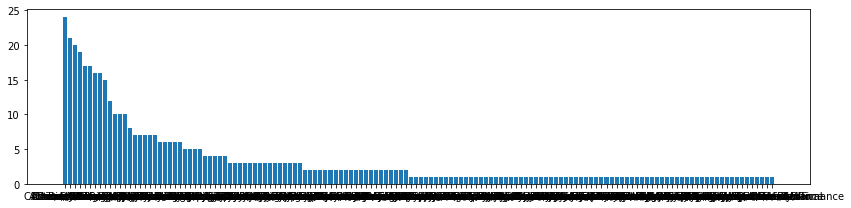

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 3))
plt.bar(dataset['Genres'].value_counts().keys(), dataset['Genres'].value_counts().values)
# plt.bar()
plt.tight_layout()

# print the x-axis names horizontally

# <font size = 3> Which type of movies (genre) the people are liking in recent years?

In [20]:
dataset['Year of release'].describe()

count     480.000000
mean     1995.460417
std        15.791388
min      1931.000000
25%      1989.750000
50%      2000.000000
75%      2006.000000
max      2015.000000
Name: Year of release, dtype: float64

From year 1931 to 2015 we try to find the movies genre where people got interested.

In [21]:
# gross, genre
df_gentre_interest = dataset[(dataset['Year of release']>2005) & (dataset['Movie Rating'] > 8)]
df_gentre_interest[['Genres', 'Movie Rating']]

# pivot table for Genre and Movie Rating

,Genres,Movie Rating
10,"Action, Crime, Drama",9.0
14,"Action, Adventure, Sci-Fi",8.8
56,"Crime, Drama, Thriller",8.2
57,"Drama, Western",8.4
59,"Animation, Adventure, Comedy",8.1
60,"Drama, Mystery, Thriller",8.4
61,"Drama, Mystery, Sci-Fi",8.5
71,"Adventure, Drama, Sci-Fi",8.6
78,"Action, Drama",8.4
81,"Action, Adventure, Sci-Fi",8.1


In [22]:
# Highest grossing film in this decade?
dataset[['Name of the movie', 'Gross Collection']].max()

Name of the movie    Zombieland
Gross Collection         936.66
dtype: object

In [23]:
# which combination worked out well?
dataset[['Director','Actors', 'Gross Collection']].sort_values(by = "Gross Collection", ascending = False).head(15)

,Director,Actors,Gross Collection
79,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",936.66
140,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",760.51
357,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",659.33
10,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
78,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",448.14
194,Steven Spielberg,"Henry Thomas, Drew Barrymore, Peter Coyote, De...",435.11
161,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",424.67
342,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",423.32
30,Roger Allers,"Rob Minkoff, Matthew Broderick, Jeremy Irons, ...",422.78
192,Gary Ross,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",408.01


# <font size = 3> who is the famous director in taking some genre?

In [24]:
dataset[['Director', 'Genres', 'Metascore']].sort_values(by = 'Metascore', ascending = False).head(15)

,Director,Genres,Metascore
0,Francis Ford Coppola,"Crime, Drama",100.0
5,Michael Curtiz,"Drama, Romance, War",100.0
69,Alfred Hitchcock,"Mystery, Romance, Thriller",100.0
32,Alfred Hitchcock,"Mystery, Thriller",100.0
108,David Lean,"Adventure, Biography, Drama",100.0
35,Orson Welles,"Drama, Mystery",100.0
145,Alfred Hitchcock,"Drama, Film-Noir, Romance",100.0
41,Stanley Donen,"Comedy, Musical, Romance",99.0
97,Charles Chaplin,"Comedy, Drama, Romance",99.0
31,Alfred Hitchcock,"Action, Adventure, Mystery",98.0


# <font size = 3> Suggest the top-5 movies based on user interest

In [25]:
dataset.describe()

,Year of release,Watchtime,Movie Rating,Metascore,Votes,Gross Collection
count,480.000000,480.000000,480.000000,480.000000,4.800000e+02,480.000000
mean,1995.460417,124.116667,7.682500,73.370833,4.574579e+05,88.600104
std,15.791388,24.839084,0.589244,13.649198,4.382781e+05,109.925233
min,1931.000000,76.000000,5.600000,31.000000,3.030000e+03,0.010000
25%,1989.750000,106.000000,7.400000,64.000000,1.488125e+05,17.087500
50%,2000.000000,121.000000,7.700000,74.000000,3.106415e+05,52.630000
75%,2006.000000,137.000000,8.100000,84.000000,6.507598e+05,118.722500
max,2015.000000,238.000000,9.300000,100.000000,2.692411e+06,936.660000


In [27]:
# input from the user
'''
1. Watchtime
2. Movie Rating
3. Genre
4. Metascore

'''

print(f"enter maximum timespan of a movie within {dataset['Watchtime'].min()} min to {dataset['Watchtime'].max()} min")
td = int(input())

if td > dataset['Watchtime'].max():
    print(f"No such movie found with that much rating. Please enter below {dataset['rating'].max()}")
    rating = float(input())

print(f"enter minimum rating needed within {dataset['Movie Rating'].min()} to {dataset['Movie Rating'].max()}")
rating = float(input())

if rating > dataset['Movie Rating'].max():
    print(f"No such movie found with that much rating. Please enter below {dataset['rating'].max()}")
    rating = float(input())
    
print("enter genre of interest")
gre = input()

print(f"enter minimum metascore within {dataset['Metascore'].min()} min to {dataset['Metascore'].max()}")
mscore = int(input())


# suggest the movie based on the above input
req_data = dataset[(dataset['Watchtime'] <= td) & (dataset['Movie Rating'] >= rating) & (dataset['Metascore'] >= mscore)].sort_values(by = ["Votes"], ascending = False)

# get movie list
movie_list = []

for i, ge in enumerate(req_data['Genres']):
    if gre in ge:
        movie_list.append(req_data.iloc[i, 0])

print(movie_list)

enter maximum timespan of a movie within 76 min to 238 min
90
enter minimum rating needed within 5.6 to 9.3
8
enter genre of interest
Drama
enter minimum metascore within 31.0 min to 100.0
54
['The Lion King', 'Stand by Me', 'Modern Times', 'City Lights']
